In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from  sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head(200000)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,133235.0,-0.789228,1.471198,-1.291998,-0.686221,0.309355,-0.323149,0.062620,0.938297,-0.190176,...,0.428462,1.177949,-0.026305,0.215007,-0.704790,-0.226072,0.349801,0.246827,0.99,0
199996,133236.0,-0.083310,1.950405,0.556845,4.022670,0.503287,0.510877,2.464482,-1.327936,-0.570295,...,-0.072613,1.374763,-0.194896,0.072835,-1.159745,0.267147,0.283539,-0.587234,151.64,0
199997,133236.0,-1.943282,0.898549,-0.402690,-0.179340,0.301361,-0.134193,1.288226,-0.478686,0.308260,...,-0.341853,-0.157110,-0.050649,-0.425485,-0.590081,0.282905,-0.730029,-0.155896,108.21,0
199998,133236.0,-1.103962,0.940976,1.652220,-0.365992,-0.299453,0.489269,-0.106126,0.832525,0.349337,...,-0.357995,-0.842373,-0.254363,-0.512391,0.456296,-0.414252,0.202450,0.054214,1.00,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
fraudulent_transactions = df[df.Class == 1]
normal_transactions = df[df.Class == 0]

In [ ]:
fraudulent_transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


# New Section

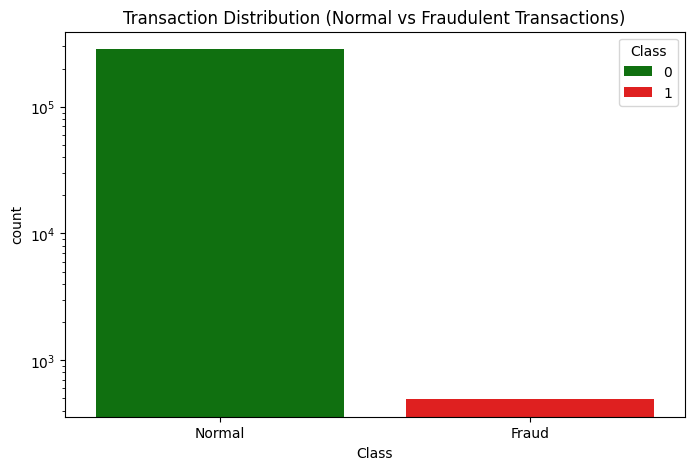

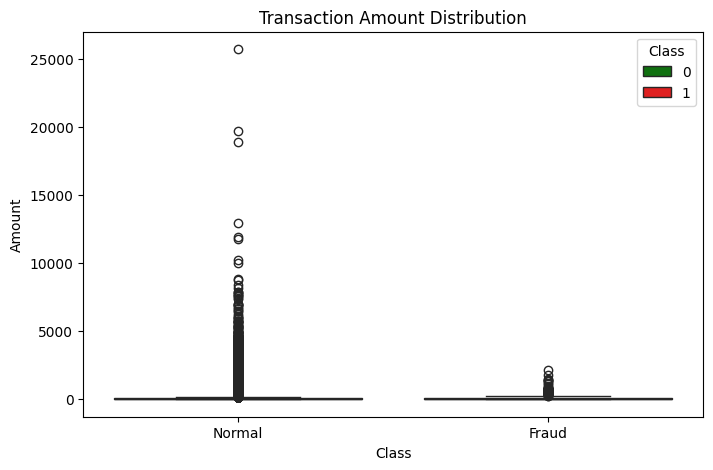

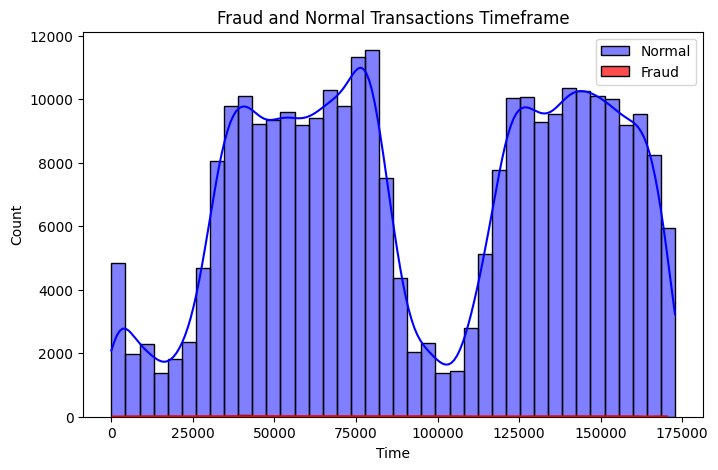

[None, None, None]

In [ ]:
plot_configs = [
    ("Class", None, "Transaction Distribution (Normal vs Fraudulent Transactions)", "count"),
    ("Class", "Amount", "Transaction Amount Distribution", "box"),
    ("Time", None, "Fraud and Normal Transactions Timeframe", "hist")
]

def generate_plot(config):
    x, y, title, plot_type = config

    plt.figure(figsize=(8, 5))

    if plot_type == "count":
        sns.countplot(x=x, data=df, hue="Class", palette=["green", "red"])
        plt.xticks(ticks=[0, 1], labels=["Normal", "Fraud"])
        plt.yscale("log")

    elif plot_type == "box":
        sns.boxplot(x=x, y=y, data=df, hue="Class", palette=["green", "red"])
        plt.xticks(ticks=[0, 1], labels=["Normal", "Fraud"])

    elif plot_type == "hist":
        sns.histplot(normal_transactions[x], bins=40, kde=True, color="blue", label="Normal", alpha=0.5)
        sns.histplot(fraudulent_transactions[x], bins=40, kde=True, color="red", label="Fraud", alpha=0.7)
        plt.legend()

    plt.title(title)
    plt.show()

list(map(generate_plot, plot_configs))

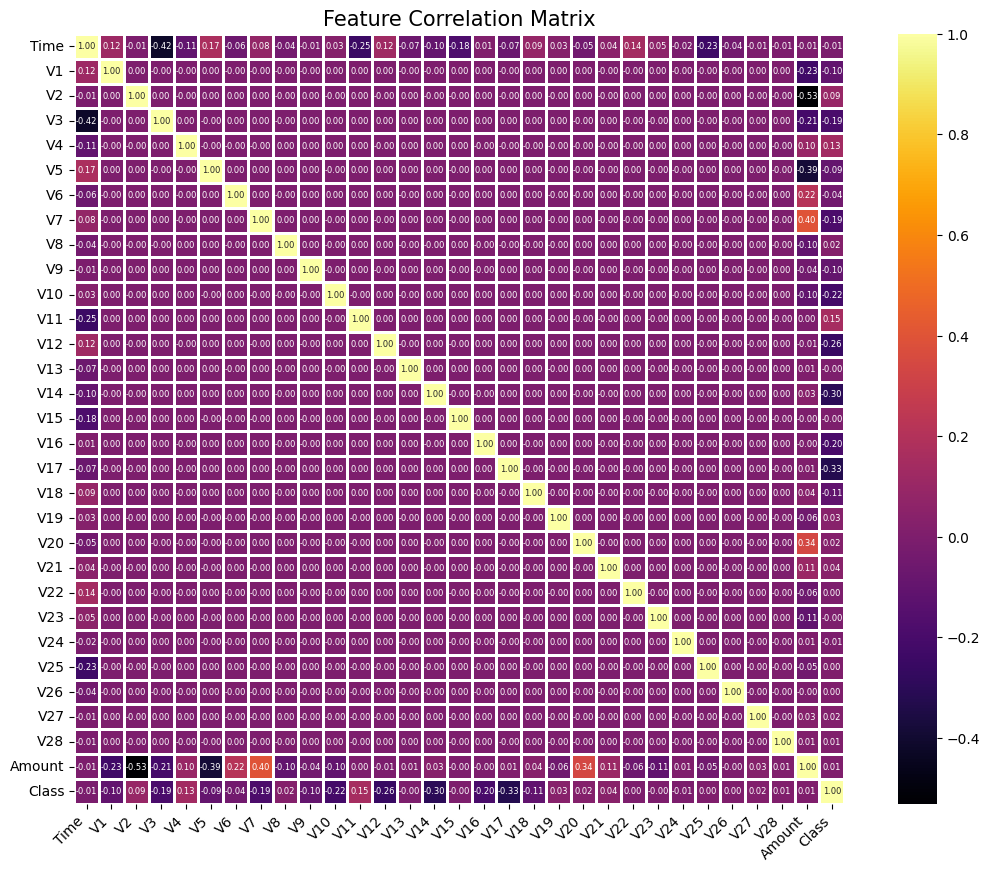

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(),
            annot=True,
            cmap="inferno",
            fmt=".2f",  # Limit decimal places for readability
            linewidths=1,
            linecolor='white',
            annot_kws={"size": 6},  # Reduce font size of annotations
            square=True)  # Keep cells square for better visibility

plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate X labels for better fit
plt.yticks(fontsize=10)  # Adjust Y labels
plt.title("Feature Correlation Matrix", fontsize=15)
plt.show()

Optimal Number of Components: 28

PCA Explained Variance Ratios:
   Principal Component  Explained Variance Ratio
0                  PC1                  0.035714
1                  PC2                  0.035714
2                  PC3                  0.035714
3                  PC4                  0.035714
4                  PC5                  0.035714
5                  PC6                  0.035714
6                  PC7                  0.035714
7                  PC8                  0.035714
8                  PC9                  0.035714
9                 PC10                  0.035714
10                PC11                  0.035714
11                PC12                  0.035714
12                PC13                  0.035714
13                PC14                  0.035714
14                PC15                  0.035714
15                PC16                  0.035714
16                PC17                  0.035714
17                PC18                  0.035714
18  

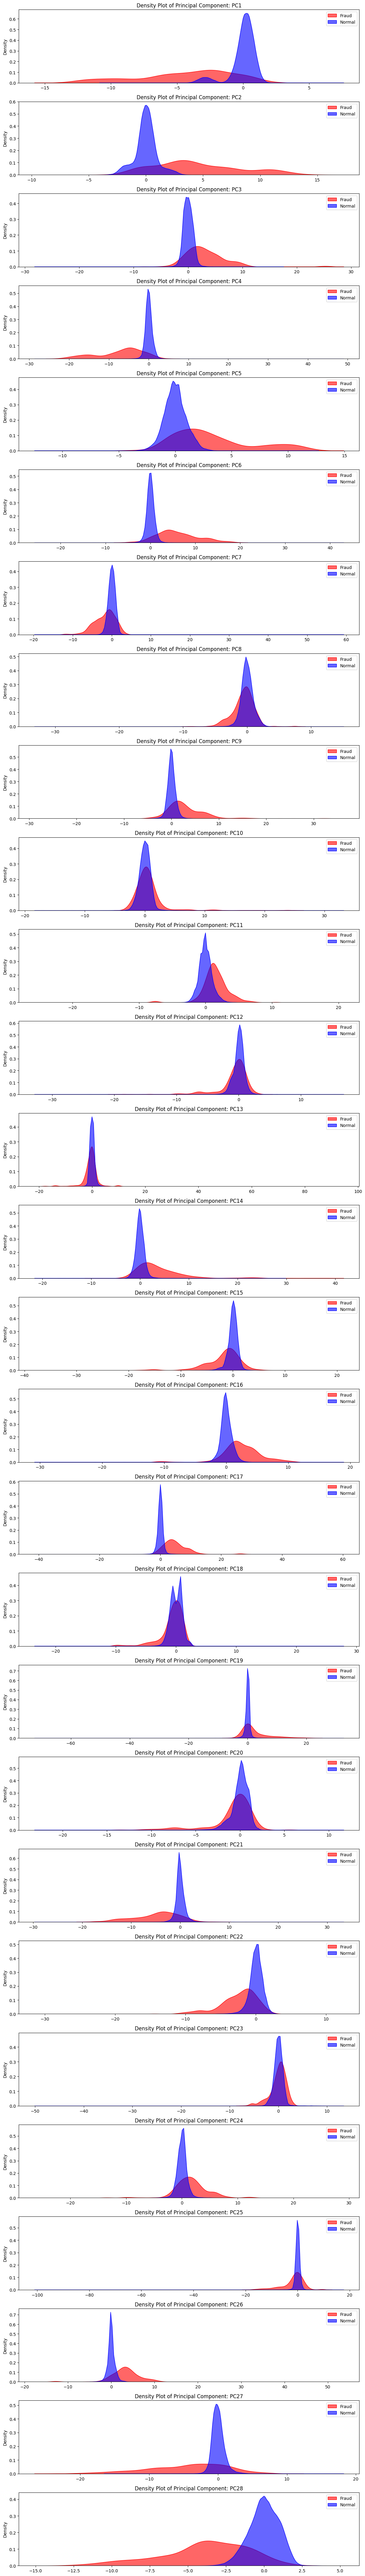

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


selected_features = df.columns[1:29]
X_selected = df[selected_features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_


cumulative_variance = np.cumsum(explained_variance)
optimal_components = np.argmax(cumulative_variance >= 0.98) + 1


pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_ratio_

pca_df = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained Variance Ratio": explained_variance
})
print("Optimal Number of Components:", optimal_components)
print("\nPCA Explained Variance Ratios:")
print(pca_df)


important_features_count = pca.n_components_
X_reduced = X_pca[:, :important_features_count]

pca_feature_names = [f"PC{i+1}" for i in range(important_features_count)]
df_pca = pd.DataFrame(X_reduced, columns=pca_feature_names)


df_pca['Class'] = df['Class'].values

df_pca = df_pca.apply(pd.to_numeric, errors='coerce').dropna()

df_pca = df_pca.astype('float64')

# Plot distributions of the selected principal components
plt.figure(figsize=(12, important_features_count * 3))
gs = gridspec.GridSpec(important_features_count, 1)

for i, cn in enumerate(df_pca.columns[:-1]):
    ax = plt.subplot(gs[i])


    fraud_values = df_pca[df_pca['Class'] == 1][cn].dropna().astype(float)
    normal_values = df_pca[df_pca['Class'] == 0][cn].dropna().astype(float)

    if len(fraud_values) < 5 or len(normal_values) < 5:
        continue

    # Plot density plots for normal and fraud transactions
    sns.kdeplot(fraud_values, fill=True, color="red", label="Fraud", alpha=0.6)
    sns.kdeplot(normal_values, fill=True, color="blue", label="Normal", alpha=0.6)

    ax.set_xlabel('')  # Remove x-axis label for clarity
    ax.set_title(f'Density Plot of Principal Component: {cn}')
    ax.legend()

plt.tight_layout()  # Adjust layout for better readability
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


from scipy.spatial.distance import jensenshannon


df_pca['Class'] = df['Class'].values.astype(int)


df_pca_1 = df_pca.replace([np.inf, -np.inf], np.nan).dropna()


for col in df_pca_1.columns[:-1]:
    df_pca_clean[col] = pd.to_numeric(df_pca_clean[col], errors='coerce')


strict_jsd_threshold = 0.68

selected_pcs_strict = []


for cn in df_pca_1.columns[:-1]:

    fraud_values = df_pca_1[df_pca_1['Class'] == 1][cn].dropna()
    normal_values = df_pca_1[df_pca_1['Class'] == 0][cn].dropna()


    if len(fraud_values) < 5 or len(normal_values) < 5:
        continue


    fraud_hist, bin_edges = np.histogram(fraud_values, bins=50, density=True)
    normal_hist, _ = np.histogram(normal_values, bins=50, density=True)

    jsd = jensenshannon(fraud_hist, normal_hist)

    print(f"Jensen-Shannon Divergence for {cn}: {jsd}")
    if jsd > strict_jsd_threshold:
        selected_pcs_strict.append(cn)

selected_pcs_strict


['PC3',
 'PC4',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC17',
 'PC18',
 'PC19',
 'PC21',
 'PC25',
 'PC26']

In [ ]:
df.drop(['V1','V2', 'V5', 'V6', 'V11', 'V16', 'V20', 'V22', 'V23', 'V24', 'V27', 'V28'], axis = 1, inplace = True)

In [ ]:
print(f'Fraud transactions: {fraudulent_transactions.shape[0]}')
print(f'Normal transactions: {normal_transactions.shape[0]}')

Fraud transactions: 492
Normal transactions: 284315


In [ ]:
normal_transactions1 = df[df['Class'] == 0].sample(n=10000, random_state=45)
fraudulent_transactions1 = df[df['Class'] == 1]

In [ ]:
print(normal_transactions1.shape)
print(fraudulent_transactions1.shape)

(10000, 19)
(492, 19)


In [ ]:
modified_df = pd.concat([normal_transactions1, fraudulent_transactions1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from imblearn.over_sampling import SMOTE


X = df.drop(columns=['Class'])
y = df['Class']


smote = SMOTE(sampling_strategy=0.15, random_state=42)  # Make fraud cases 10% of normal cases
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
scaler1 = StandardScaler()
X_scaled1 = scaler1.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled1, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


def preprocess_tensor(X, y):
    """Converts preprocessed numpy arrays to TensorFlow tensors."""
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    y = tf.convert_to_tensor(y.values, dtype=tf.float32)
    return X, y

X_train_tf, y_train_tf = preprocess_tensor(X_train, y_train)
X_test_tf, y_test_tf = preprocess_tensor(X_test, y_test)


In [ ]:
from tensorflow.keras.callbacks import Callback

# Custom callback to stop training when AUC reaches 0.97
class AUCStopping(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.98:  # Check validation AUC
            print(f"\nStopping training: Accuracy reached {logs.get('accuracy'):.4f} at epoch {epoch + 1}")
            self.model.stop_training = True

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])


history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[AUCStopping()], verbose=1)


test_loss, test_acc, test_auc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test AUC: {test_auc:.4f}')




Epoch 1/30
4088/4088 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8860 - auc: 0.9345 - loss: 0.2565 - val_accuracy: 0.9905 - val_auc: 0.9959 - val_loss: 0.0333
Epoch 2/30
4078/4088 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9871 - auc: 0.9901 - loss: 0.0471
Stopping training: Accuracy reached 0.9875 at epoch 2
4088/4088 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9871 - auc: 0.9901 - loss: 0.0471 - val_accuracy: 0.9921 - val_auc: 0.9967 - val_loss: 0.0264
2044/2044 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9927 - auc: 0.9967 - loss: 0.0259
Test Accuracy: 0.9921
Test AUC: 0.9967


# New Section

2044/2044 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


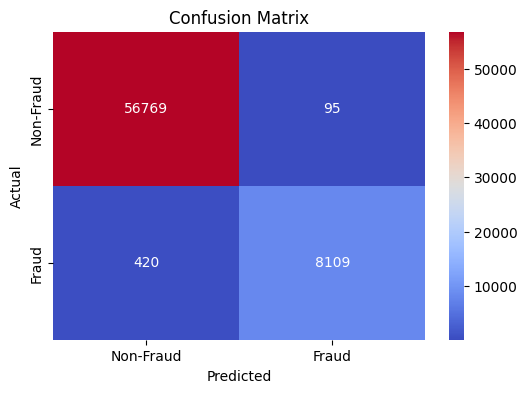

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_test_np = y_test.numpy() if hasattr(y_test, "numpy") else np.array(y_test)


y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()  # Ensure it's a 1D array


cm = confusion_matrix(y_test_np, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], digits=4)

# Print the classification report
print(report)

              precision    recall  f1-score   support

   Non-Fraud     0.9927    0.9983    0.9955     56864
       Fraud     0.9884    0.9508    0.9692      8529

    accuracy                         0.9921     65393
   macro avg     0.9905    0.9745    0.9824     65393
weighted avg     0.9921    0.9921    0.9921     65393

